Por qué el dataset?
* Para conocer que vocabulario los clientes asocian a un buen producto, y cual a uno malo.
* Qué características se asocian a un buen rating y cuál a uno malo
* Para tener matices. Si le doy 2 estrellas, pero las palabras corresponden a un 1, capaz que el producto es de lo peorcito de los de 2 estrellas.
* y probablemente más...

Objetivo de este análisis: inspeccionar la base de datos para generar un modelo predictivo por el cuál, sabiendo el comentario, tengamos una puntuación.

El archivo es de Kaggle, pero es un sample de 150.000 observaciones (el original tiene 500 mil) por temas de espacio.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import re


In [20]:
# Cargar el dataset (asumiendo que ya ha sido descargado)
df = pd.read_csv('https://github.com/guillelezama/eda_course/raw/main/data/raw/Reviews2.csv')

# Información general sobre el DataFrame
print("\nInformación general del DataFrame:")
print(df.info())


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Unnamed: 0              150000 non-null  int64 
 1   index                   150000 non-null  int64 
 2   Id                      150000 non-null  int64 
 3   ProductId               150000 non-null  object
 4   UserId                  150000 non-null  object
 5   ProfileName             149992 non-null  object
 6   HelpfulnessNumerator    150000 non-null  int64 
 7   HelpfulnessDenominator  150000 non-null  int64 
 8   Score                   150000 non-null  int64 
 9   Time                    150000 non-null  int64 
 10  Summary                 149990 non-null  object
 11  Text                    150000 non-null  object
dtypes: int64(7), object(5)
memory usage: 13.7+ MB
None


In [21]:
# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())

Primeras filas del DataFrame:
   Unnamed: 0   index      Id   ProductId          UserId  \
0           0  199320  199321  B004O5Y59O  A3BFDEBT5IV4UN   
1           1  500849  500850  B002TN49F8  A3PJZ8TU8FDQ1K   
2           2   91889   91890  B004YV80O4   AKE6DXEN3GWPC   
3           3  456313  456314  B005E5IMII   A3X1WP7M9ICAA   
4           4  414758  414759  B005VOOLXM   A3DH53FPYSP9E   

                       ProfileName  HelpfulnessNumerator  \
0                          Groucho                     4   
1                     Jared Castle                     0   
2  Cyndi Beane Henry "Texicanwife"                     2   
3                        ladysiren                     0   
4                        Media Man                     1   

   HelpfulnessDenominator  Score        Time  \
0                       4      5  1319760000   
1                       0      4  1284422400   
2                       3      5  1312588800   
3                       0      4  1350345600   
4 

In [22]:
# Mostrar las últimas filas del DataFrame
print("Últimas filas del DataFrame:")
print(df.tail())

Últimas filas del DataFrame:
        Unnamed: 0   index      Id   ProductId          UserId  \
149995      149995  213584  213585  B00141OVJA  A2Y13Q771A5YE5   
149996      149996  175654  175655  B0016BS29S   AT7Q1LVNHMPES   
149997      149997  339497  339498  B00375LB9E  A3C18MRX72K9RV   
149998      149998  564772  564773  B003DWYXPU  A345TEOPA65GXA   
149999      149999  437131  437132  B000WFPJIG  A1ONBPGFNO443W   

                                        ProfileName  HelpfulnessNumerator  \
149995                                     T. Stacy                     1   
149996  Kathy S. Spencer "Spencer's Quarter Horses"                     0   
149997                                         Meli                     1   
149998                                  Jay Bunting                     1   
149999                            Jerry Christensen                     2   

        HelpfulnessDenominator  Score        Time  \
149995                       1      5  1241481600   
14999

In [23]:
# Verificar si hay valores nulos
print("\nValores nulos en el DataFrame:")
print(df.isnull().sum())


Valores nulos en el DataFrame:
Unnamed: 0                 0
index                      0
Id                         0
ProductId                  0
UserId                     0
ProfileName                8
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   10
Text                       0
dtype: int64


In [24]:
len(df['Text'][0].split())

143

In [25]:
# Contar el número de palabras en cada reseña
df['word_count'] = df['Text'].apply(lambda x: len(x.split()))

In [26]:
df.head()

,Unnamed: 0,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,word_count
0,0,199320,199321,B004O5Y59O,A3BFDEBT5IV4UN,Groucho,4,4,5,1319760000,Wonderful,This has to be the best 'at home' espresso I h...,143
1,1,500849,500850,B002TN49F8,A3PJZ8TU8FDQ1K,Jared Castle,0,0,4,1284422400,Melitta provides rich flavor at a great value,"Half the price of Starbucks, Melitta offers gr...",197
2,2,91889,91890,B004YV80O4,AKE6DXEN3GWPC,"Cyndi Beane Henry ""Texicanwife""",2,3,5,1312588800,Never Let Your Pantry Be Without This!,"As an Amazon Vine participant, I often get to ...",131
3,3,456313,456314,B005E5IMII,A3X1WP7M9ICAA,ladysiren,0,0,4,1350345600,Hoop Cheese,The Hoop Cheese made it all the way to Afghani...,28
4,4,414758,414759,B005VOOLXM,A3DH53FPYSP9E,Media Man,1,2,3,1334620800,"Unique flavors, mediocre taste",We're a 2-3 cup a day coffee household. This ...,305


In [27]:
# Mostrar estadísticas descriptivas de la cantidad de palabras en cada reseña
print("\nEstadísticas descriptivas de la cantidad de palabras en cada reseña:")
print(df['word_count'].describe())


Estadísticas descriptivas de la cantidad de palabras en cada reseña:
count    150000.000000
mean         80.432500
std          80.463062
min           3.000000
25%          33.000000
50%          56.000000
75%          98.000000
max        3432.000000
Name: word_count, dtype: float64


In [28]:
# Descargar stop words si no están ya descargadas
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
word_tokenize(df['Text'][0].lower())

['this',
 'has',
 'to',
 'be',
 'the',
 'best',
 "'at",
 'home',
 "'",
 'espresso',
 'i',
 'have',
 'ever',
 'had',
 '.',
 'i',
 'love',
 'a',
 'very',
 'strong',
 'cup',
 'of',
 'coffee',
 ',',
 'and',
 'whenever',
 'i',
 'go',
 'to',
 'that',
 'chain',
 'place',
 ',',
 'you',
 'know',
 'the',
 'one',
 'i',
 "'m",
 'talking',
 'about',
 ',',
 'for',
 'coffee',
 'i',
 'get',
 'a',
 'regular',
 'coffee',
 'with',
 'a',
 'shot',
 'of',
 'espresso',
 '(',
 'red-eye',
 '?',
 ')',
 '.',
 'it',
 'costs',
 'me',
 'an',
 'arm',
 'and',
 'a',
 'leg',
 'too',
 '!',
 'now',
 'i',
 'can',
 'do',
 'it',
 'at',
 'home.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'bold',
 ',',
 'rich',
 ',',
 'aromatic',
 'and',
 'it',
 'tastes',
 'less',
 'acid-y',
 'than',
 'the',
 'other',
 'espressos',
 'that',
 'i',
 "'ve",
 'tried',
 '...',
 'this',
 'was',
 'an',
 'absolute',
 'pleasure',
 'to',
 'drink',
 '.',
 'i',
 'do',
 "n't",
 'even',
 'bother',
 'with',
 'the',
 'frother',
 'to',
 'top',
 'my',

In [30]:
# List Comprehension
print([1,2,3,4,5,6,7,8,9,10])
print([x for x in range(1,11)])
lista=[]
for i in range(1,11):
  lista=lista + [i]
print(lista)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [31]:
# Limpiar texto: eliminar stop words y puntuación
def clean_text(text):
    stop_words = set(stopwords.words('english'))
    text = re.sub(r'<br\s*/?>', ' ', text)  # Reemplazar <br> o <br /> por un espacio
    text = re.sub(r'<.*?>', '', text)  # Eliminar cualquier otra etiqueta HTML
    tokens = word_tokenize(text.lower())
    cleaned_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    # palabra para todas las palabras en la lista de tokens, si la palabra es alfanumerica y la palabra no forma parte de la lista de stopwords
    return ' '.join(cleaned_tokens)

# Aplicar limpieza al texto
df['cleaned_text'] = df['Text'].apply(clean_text)

# Contar el número de palabras en cada reseña
df['word_count_clean'] = df['cleaned_text'].apply(lambda x: len(x.split()))

# Mostrar estadísticas descriptivas de la cantidad de palabras en cada reseña
print("\nEstadísticas descriptivas de la cantidad de palabras en cada reseña:")
print(df['word_count_clean'].describe())


Estadísticas descriptivas de la cantidad de palabras en cada reseña:
count    150000.000000
mean         38.743407
std          39.516164
min           1.000000
25%          16.000000
50%          27.000000
75%          47.000000
max        1887.000000
Name: word_count_clean, dtype: float64


'cleaned_text' es la columna con el texto limpiado de stopwords, signos de puntuacion y codigo html. Al hacer eso, en promedio, el numero de palabras cae mitad.

In [32]:
print(df['Text'][0])

This has to be the best 'at home' espresso I have ever had.  I love a very strong cup of coffee, and whenever I go to that chain place, you know the one I'm talking about, for coffee I get a regular coffee with a shot of espresso (red-eye?).  It costs me an arm and a leg too!  Now I can do it at home.<br /><br />Bold, rich, aromatic and it tastes less acid-y than  the other espressos that I've tried...this was an absolute pleasure to drink.  I don't even bother with the frother to top my coffee, because the espresso has just enough crema on top to make this an even richer drink.<br />Yum.<br /><br />AND if you use the subscription service like I did, you can save yourself at least 15% and never have to worry about  remembering to re-order again!


In [33]:
print(df['cleaned_text'][0])

best home espresso ever love strong cup coffee whenever go chain place know one talking coffee get regular coffee shot espresso costs arm leg home bold rich aromatic tastes less espressos tried absolute pleasure drink even bother frother top coffee espresso enough crema top make even richer drink yum use subscription service like save least never worry remembering


In [34]:
# Mostrar la reseña con mayor y menor cantidad de palabras
longest_review = df.loc[df['word_count'].idxmax()]
shortest_review = df.loc[df['word_count'].idxmin()]

print(f"\nResumen de reseña más larga: {longest_review['Summary']} con {longest_review['word_count']} palabras.")
print(f"Resumen de reseña más corta: {shortest_review['Summary']} con {shortest_review['word_count']} palabras.")



Resumen de reseña más larga: An okay filtered municipal tap water with slight "chalky" aftertaste, but the misleading health claims and hype are quackery! con 3432 palabras.
Resumen de reseña más corta: good con 3 palabras.


In [35]:
print(f"\nReseña más larga: {longest_review['Text']} con {longest_review['word_count']} palabras.")
print(f"Reseña más corta: {shortest_review['Text']} con {shortest_review['word_count']} palabras.")


Reseña más larga: Fuzzy Wuzzy's Summary:<br />*** Somewhat recommended, with reservations and only lukewarm fuzzies.<br /><br />Positives:<br /><br />+ Not too expensive compared to other bottled water, although it is not cheap either.<br /><br />Negatives:<br /><br />- This bottled water product's labeling, product descriptions, and health claims are misleading.<br /><br />At first glance, this 1.5-liter bottle of water that I am reviewing looks like another one of the many varieties of bottled water on the market.  There are many kinds of bottled water: "spring water" produced from an underground formation where the groundwater naturally flows up to the Earth's surface, "artesian water" obtained from a well that taps into an underground aquifer, "mineral water" produced from a well or spring that naturally contains trace amounts of minerals that some people consider to provide health benefits, "ground/well water" produced from a well that tapes into an aquifer, "sparkling water" fro

In [36]:
# distribución de las calificaciones de las reseñas
df['Score'].value_counts()/len(df)

,count
Score,
5,0.637927
4,0.142720
1,0.092247
3,0.074787
2,0.052320


Aquí terminamos el Miércoles. Veamos ahora
* Cómo se relaciona el score con el largo de la review
* Ver palabras frecuentes para reseñas positivas y negativas


Comparando la distribución del largo de la review por Score:


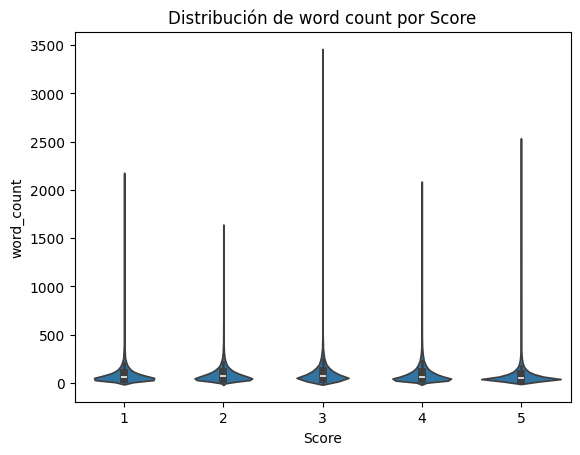

In [37]:
# Comparar la distribución de el largo de la review por Score
print("\nComparando la distribución del largo de la review por Score:")
sns.violinplot(x='Score', y='word_count', data=df)
plt.title('Distribución de word count por Score')
plt.show()

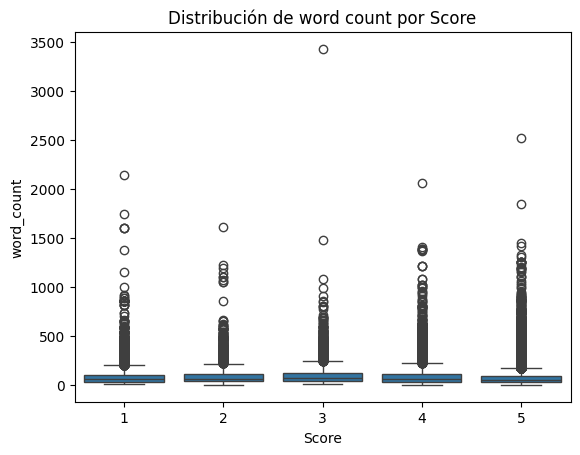

In [38]:
sns.boxplot(data=df, x="Score", y="word_count")
plt.title('Distribución de word count por Score')
plt.show()


La distribución del word count es muy parecida por puntuacion.

Podríamos hacer es un test ANOVA para ver si las medias son iguales.

In [40]:
from scipy.stats import  f_oneway

In [41]:
# Aplicar ANOVA para comparar el word count entre las diferentes scores
anova_result = f_oneway(df[df['Score'] == 1]['word_count'].dropna(),
                        df[df['Score'] == 2]['word_count'].dropna(),
                        df[df['Score'] == 3]['word_count'].dropna(),
                        df[df['Score'] == 4]['word_count'].dropna(),
                        df[df['Score'] == 5]['word_count'].dropna())

print(f"ANOVA para word count y Score: F-stat={anova_result.statistic}, p-value={anova_result.pvalue}")


ANOVA para word count y Score: F-stat=423.4135273226829, p-value=0.0


In [45]:
# Computando medias para cada score
print(np.mean(df[df['Score'] == 1]['word_count']))
print(np.mean(df[df['Score'] == 2]['word_count']))
print(np.mean(df[df['Score'] == 3]['word_count']))
print(np.mean(df[df['Score'] == 4]['word_count']))
print(np.mean(df[df['Score'] == 5]['word_count']))


87.0095396400954
90.31867991845056
96.42699233374933
92.0461509715994
74.19725360281745


La media de conteo de palabras es distinta entre los distintos scores (testeado con un ANOVA). Para un score de 5, la media es mas baja. Pero no observamos otras grandes diferencias con el box plot o el violin plot.

In [46]:
# Separar reseñas positivas y negativas
positive_reviews = df[df['Score'] == 5]['cleaned_text']
negative_reviews = df[df['Score'] == 1]['cleaned_text']

# Generar Word Clouds
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

In [49]:
len(positive_text)

In [ ]:
# Word Cloud para Reseñas Positivas
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Reseñas Positivas')
plt.show()


In [ ]:
# Word Cloud para Reseñas Negativas
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Reseñas Negativas')
plt.show()

In [ ]:
# Combinar todas las reseñas en un solo texto
all_reviews = ' '.join(df['cleaned_text'])

# Contar la frecuencia de cada palabra
word_freq = Counter(all_reviews.split())

# Mostrar las 10 palabras más comunes
print("\nLas 10 palabras más comunes en todas las reseñas:")
print(word_freq.most_common(10))


¿Cuál es el problema? Recordemos que nosotros queremos saber qué palabras predicen una mala puntuación.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# Usar TF-IDF para identificar palabras importantes en las reseñas
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = tfidf.fit_transform(df['Text'])

In [ ]:
# Obtener los nombres de las características
feature_names = tfidf.get_feature_names_out()

# Convertir la matriz TF-IDF en un DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

In [ ]:
feature_names

In [ ]:
# Mostrar las 10 palabras con mayor puntuación TF-IDF en la primera reseña
print("\nTop 10 palabras con mayor puntuación TF-IDF en la primera reseña:")
print(tfidf_df.iloc[0].sort_values(ascending=False).head(10))

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Realizar clustering KMeans sobre la matriz TF-IDF
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(tfidf_matrix)
df['Cluster'] = kmeans.labels_

df['Cluster'].value_counts()

In [ ]:
# Dato Curioso: Mostrar las palabras más comunes en cada cluster
for i in range(3):
    cluster_reviews = df[df['Cluster'] == i]['Text']
    cluster_words = ' '.join(cluster_reviews)
    cluster_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(cluster_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud del Cluster {i}')
    plt.show()
